# Отвечаемость 

- В исследовании участвуют только спецы, зарегистрировавшиеся с 1 января 2020.
- Смотрим только ЛГ заказы.
- Учитывается только первый ответ спеца на приглашение (если была дальнейшая переписка, то она уже не учитывается).
- Пока не учитываем отмену заказа и выбор клиентом спеца.

### Важные детали:

Не учитываются заказы, в которых спец получил приглашение по ссылке - проект [Бесплатный профи](https://repetitors.info/admin/aforum/?t=151677). Там отклик от лица спеца отправляется автоматически. И это не отражает реальную отвечаемость спеца, потому что:
- Если у спеца ТОЛЬКО автоматические ответы и мы поставим ему среднюю отвечаемость "менее минуты", то клиент будет ожидать, что ему ответят быстро. Но это не так.
- Если спец отвечает вообще-то очень долго, но у него много авто-откликов, с заниженным средним мы не дадим ему правильную обратную связь "чувак, ты медленно отвечаешь в чатах, обрати внимание".<br>

(исключаем заказы, где было событие o_pchosen_free)

### Что хотим посчитать:
1. Среднее время ответа на запрос (приглашение) клиента
2. Процент отвеченных запросов (приглашений) клиента
3. Процент отвеченных положительно (отклик) запросов клиента
4. Просто ответ на сообщение клиента (сообщение требует ответа, если есть ? или вопросительное слово)


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import math
import pandas
import statistics
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
def percentile(N, percent, key=lambda x: x):
    if not N:
        return None
    k = (len(N) - 1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return key(N[int(k)])
    d0 = key(N[int(f)]) * (c - k)
    d1 = key(N[int(c)]) * (k - f)
    return d0 + d1

def show_usual_stats(data):
    if len(data) == 0:
        print 'No data'
        return 
    data = sorted(data)
    print "Percentile 25% = ", percentile(data, 0.25)
    print "Percentile 50% = ", percentile(data, 0.5)
    print "Percentile 75% = ", percentile(data, 0.75)
    print "Percentile 95% = ", percentile(data, 0.95)
    print "\nAverage = ", round(sum(data) * 1.0 / len(data), 2)
    print "MAX = ", max(data)
    print "Data len: ", len(data)

In [4]:
column_names = ['order_city_id', 'project_name', 'prep_id', 'prep_dt', 'order_id', 
                'invite_id', 'invite_dt', 'invite_txt', 'invite_code', 
                'answer_id', 'answer_dt', 'answer_txt', 'answer_code']

df = pandas.read_csv('invites_answers_events.tsv', delimiter='\t', header=None, names = column_names, 
                     parse_dates = ['prep_dt', 'invite_dt', 'answer_dt'])
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65455 entries, 0 to 65454
Data columns (total 13 columns):
order_city_id    65455 non-null object
project_name     65455 non-null object
prep_id          65455 non-null object
prep_dt          65455 non-null datetime64[ns]
order_id         65455 non-null int64
invite_id        65455 non-null int64
invite_dt        65455 non-null datetime64[ns]
invite_txt       160 non-null object
invite_code      65455 non-null object
answer_id        25446 non-null float64
answer_dt        25446 non-null datetime64[ns]
answer_txt       21144 non-null object
answer_code      25446 non-null object
dtypes: datetime64[ns](3), float64(1), int64(2), object(7)
memory usage: 6.5+ MB
None


,order_city_id,project_name,prep_id,prep_dt,order_id,invite_id,invite_dt,invite_txt,invite_code,answer_id,answer_dt,answer_txt,answer_code
0,sochi.mstr,«МастерДел»,7774V,2020-01-23,26780723,1373455745,2020-03-10 22:04:07,NaN,o_pchosen,1.373464e+09,2020-03-10 22:13:47,<div prch=7040>Не подходит бюджет</div>,r_order_refused
1,smolensk.krst,«Крэйс–Мастерс»,A-7,2020-01-13,26594715,1414247678,2020-04-29 12:15:19,NaN,o_pchosen,NaN,NaT,NaN,NaN
2,chechnya-dmstf,Новые вертикали,AAA63,2020-01-08,26947517,1381135170,2020-03-17 21:45:11,NaN,o_pchosen,NaN,NaT,NaN,NaN
3,penza.mstr,«МастерДел»,AAA70,2020-02-01,26063163,1337092178,2020-02-10 13:57:02,NaN,o_pchosen,1.337132e+09,2020-02-10 14:15:56,"<b>ev_code=r_zayavka, cancel_dt=2020-03-08 19:...",r_zayavka0
4,penza.mstr,«МастерДел»,AAA70,2020-02-01,26063163,1337092178,2020-02-10 13:57:02,NaN,o_pchosen,1.371271e+09,2020-03-08 19:56:11,"<b>ev_code=r_order_refused, cancel_dt=2020-04-...",r_order_refused0


## Сколько всего препов получают приглашения от клиента
Под приглашениями имеются в виду нажатия на кнопку "Предложить заказ" и "Написать сообщение"

In [5]:
print 'Число уникальных препов за период: ', df.prep_id.nunique()

Число уникальных препов за период:  20824


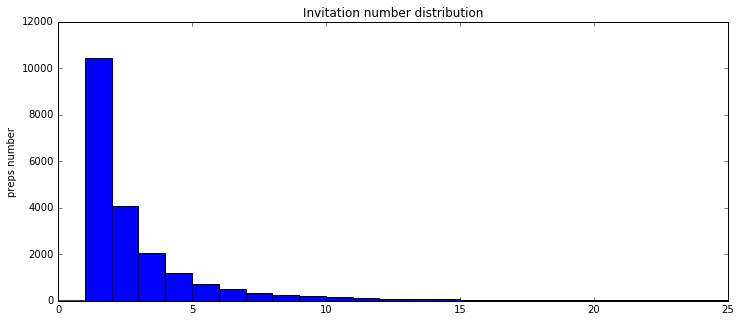

In [6]:
plt.figure(figsize=(12,5))
df.groupby(['prep_id'])['invite_id'].count().plot.hist(bins = 25, range = (0,25))
plt.title("Invitation number distribution")
plt.ylabel('preps number')
plt.show()

В гистограмме намеренно отрезан длиннющий хвост, потому что иначе не видно, что слева.

In [7]:
print 'Препы, у которых максимальное количество приглашений:'
print df.groupby(['prep_id'])['invite_id'].count().sort_values(ascending=False)[:10]

Препы, у которых максимальное количество приглашений:
prep_id
OzerovaZB2       653
ErshovAS14       199
MaltsevaAA29     180
KarimovSR4       175
ShastinAV        146
IvanovaAU48      143
FrolovRO2        142
KomissarovaVI    140
SaprykinaTM      128
TishaiRR         126
Name: invite_id, dtype: int64


Очень подозрительная OzerovaZB2 (маникюр) - целых 653 приглашений. А отправила она всего 38 заявок.<br>
Посмотрим на неё поближе.

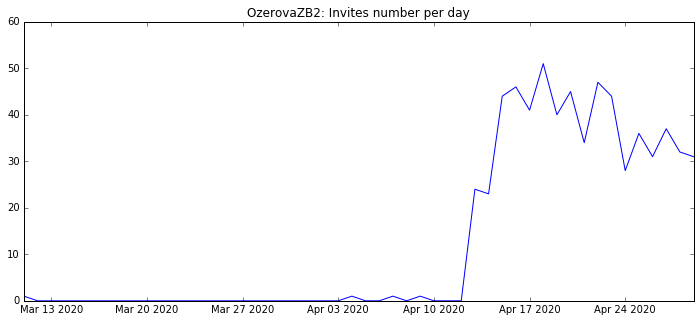

In [8]:
ozerova = df[df['prep_id'] == 'OzerovaZB2']
ozerova['invite_dt'] = ozerova['invite_dt'].dt.date

# ozerova.groupby(['invite_dt'])['invite_id'].count()

ozerova_invites_per_day = []
dates = [ozerova['invite_dt'].min() + timedelta(n) for n in range(50)]
for single_date in dates: 
    ozerova_invites_per_day.append(ozerova[ozerova['invite_dt'] == single_date]['invite_id'].count()) 

plt.figure(figsize=(12,5))
plt.plot(dates, ozerova_invites_per_day)
plt.title('OzerovaZB2: Invites number per day')
plt.show()

13 апреля у Озёровой ЧТО-ТО случилось, и она стала получать по 40-50 приглашений в день. <br>
Выяснилось, что с 13 апреля в ранжировании стали давать сильный буст спецам, у которых указан "web" в анкете. А Озёрова - одна из немногих маникюрщиц, кто якобы оказывает услуги дистанционно. Поэтому она резко оказалась в топе и её стали выбирать благодаря повышенному спросу. <br>
Этот баг оперативно поправили 30 апреля.

In [9]:
df_preps_invites_count = df.groupby(['prep_id'])['invite_id'].count()
print 'Процент препов, у которых всего 1 приглашение: ', \
        round(len(df_preps_invites_count[df_preps_invites_count == 1])*100.0/df.prep_id.nunique(), 2), '%'

Процент препов, у которых всего 1 приглашение:  50.09 %


## % отвеченных приглашений


In [10]:
## TESTING
# prep_id = 'kosorukovAA4'
# df[df['prep_id'] == prep_id]['answer_id'].isnull().sum() * 100.0 / df[df['prep_id'] == prep_id]['order_id'].count()

In [11]:
df_preps_answers_count = df[df['answer_id'] > 0].groupby(['prep_id'])['order_id'].count()
df_preps_answers_percent = df_preps_answers_count * 100.0 / df_preps_invites_count

In [12]:
def show_hist_of_answer_percent(INVITES_N = 1):
    answers_percent_list = []
    for prep_id in df_preps_invites_count[df_preps_invites_count >= INVITES_N].index:
        if df_preps_answers_percent[prep_id] > 0:
            answers_percent_list.append(df_preps_answers_percent[prep_id])
        else:
            answers_percent_list.append(0)

    show_usual_stats(answers_percent_list)
    plt.figure(figsize=(12,5))
    plt.hist(answers_percent_list, bins = 25)
    plt.show()

Смотрим препов, у которых хотя бы 1 приглашение (просто чтобы понять, какой беспорядок тут в распределении).<br>
Видим небольшой пик на 50% (во многом это те, у кого 2 приглашения и 1 из них отвечено).<br>
Пик на 100% (во многом это те, у кого 1 приглашение и оно отвечено).

Percentile 25% =  0.0
Percentile 50% =  0.0
Percentile 75% =  66.6666666667
Percentile 95% =  100.0

Average =  30.16
MAX =  100.0
Data len:  20824


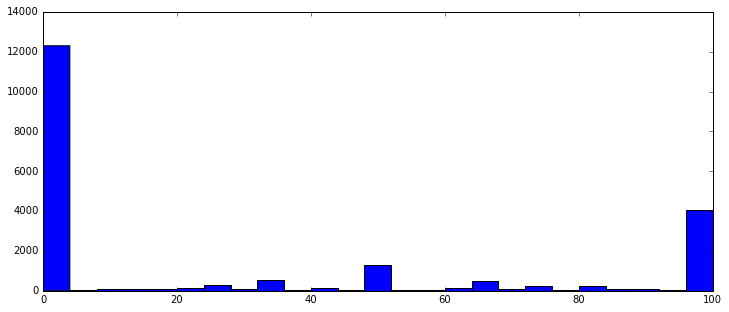

In [13]:
show_hist_of_answer_percent(1)

Теперь смотрим препов, у которых хотя бы 5 приглашений. (таких 14.5%)

Percentile 25% =  2.85714285714
Percentile 50% =  40.0
Percentile 75% =  72.7833894501
Percentile 95% =  100.0

Average =  41.32
MAX =  100.0
Data len:  3075


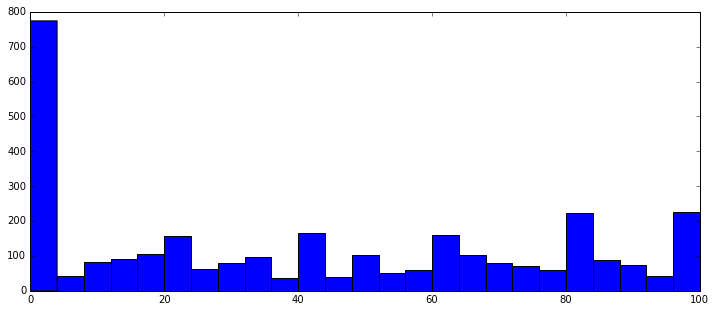

In [14]:
show_hist_of_answer_percent(5)

Теперь смотрим препов, у которых хотя бы 20 приглашений. (таких 1.5%)<br>
Здесь с большой натяжкой можно увидеть гаусса справа. 

Percentile 25% =  18.9832689833
Percentile 50% =  62.962962963
Percentile 75% =  83.3333333333
Percentile 95% =  95.1800232288

Average =  53.16
MAX =  100.0
Data len:  331


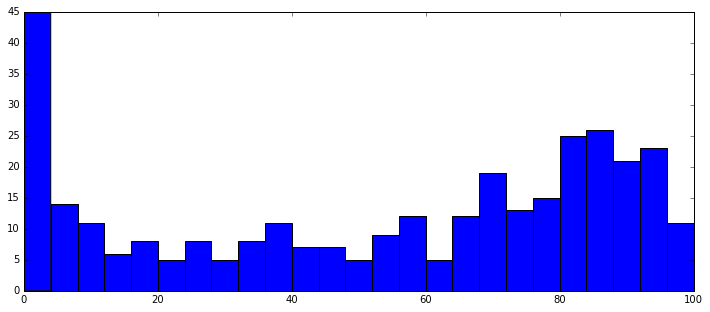

In [15]:
show_hist_of_answer_percent(20)

In [17]:
# round(len(df_preps_invites_count[df_preps_invites_count >= 20])*100.0/df.prep_id.nunique(), 2)

Попробовала посчитать то же самое на выборке препов, зарегистрировавшихся с 1 января по 1 апреля (1 марта), <br>
учитывать только тех, у кого было достаточно времени, чтобы получить хотя бы 1 приглашение. <br>
Но по ним картинка очень мало отличается.


In [18]:
# print len(df[df['prep_dt'] < '2020-04-01'].groupby(['prep_id']).count())
# 18284

# df = df[df['prep_dt'] < '2020-03-01']

## Среднее время ответа по препам

Оставляем в табличке только время первого приглашения и время первого ответа на него (приглашения без ответа не учитываются)

In [20]:
df_answered_invites = df[df['answer_id'] > 0]
df_first_invites = df_answered_invites.groupby(['prep_id', 'order_id', 'invite_dt'])['invite_dt'].agg(['min'])
df_first_answers = df_answered_invites.groupby(['prep_id', 'order_id', 'invite_dt'])['answer_dt'].agg(['min'])
df_first_answers.head()

,,,min
prep_id,order_id,invite_dt,
7774V,26780723,2020-03-10 22:04:07,2020-03-10 22:13:47
AAA70,26063163,2020-02-10 13:57:02,2020-02-10 14:15:56
AAV13,25961886,2020-02-06 16:15:06,2020-02-06 16:16:38
AaaaaaSA,27446990,2020-04-23 22:05:39,2020-04-23 22:17:02
AbaevEA,27144029,2020-03-28 08:25:29,2020-03-28 14:13:44


Считаем разницу между приглашением и ответом, записываем в минутах

In [21]:
df_answers_diffs = df_first_answers - df_first_invites
df_answers_diffs['minutes_diff'] = df_answers_diffs['min'].dt.total_seconds() / 60
df_answers_diffs['minutes_diff'] = df_answers_diffs['minutes_diff'].round(1)
df_answers_diffs[5:11]

min  minutes_diff
prep_id            order_id invite_dt                                 
AbakargadzhievaDSh 27250774 2020-04-04 15:37:27 00:28:38          28.6
AbakumovAK         27675550 2020-04-28 14:37:58 04:34:26         274.4
AbankinaAD         26185151 2020-02-15 20:32:18 10:39:47         639.8
                   27065105 2020-03-23 18:25:39 00:03:04           3.1
                   27396194 2020-04-13 12:11:37 00:03:49           3.8
                   27582115 2020-04-23 16:06:54 00:01:55           1.9

In [22]:
median_answer_time = df_answers_diffs.groupby(level = 0).median()
mean_answer_time = df_answers_diffs.groupby(level = 0).mean()

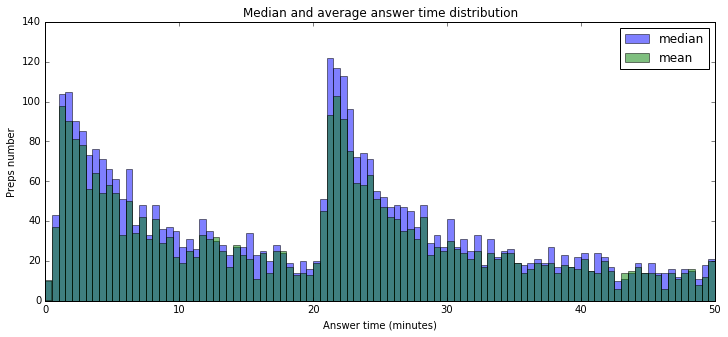

In [31]:
MAX_VALUE = 50

plt.figure(figsize=(12,5))
plt.hist(median_answer_time.values, bins = 100, alpha=0.5, label='median', range = (0,MAX_VALUE))
plt.hist(mean_answer_time.values, bins = 100, alpha=0.5, label='mean', range = (0,MAX_VALUE))
plt.legend(loc='upper right')
plt.title('Median and average answer time distribution')
plt.xlabel('Answer time (minutes)')
plt.ylabel('Preps number')
plt.show()

**Загадка:** <br>Откуда взялся такой жирный пик на 23-25 минутах?<br>
**Моя гипотеза:** <br>Пуши спецам о приглашении приходят с задержкой 20-22 минуты. Такое возможно на Андроиде (у меня с обновление на 9 ось стали ужасно работать пуши, приходят с большим опозданием) - проблема общеизвестная https://www.mql5.com/ru/forum/306009. Возможно, как-то починив эти пуши мы сократим среднее время ответов :) 

Вот примеры таких заказов:

In [34]:
df_answers_diffs[df_answers_diffs['minutes_diff'] == 24]['min'][:40]

prep_id        order_id  invite_dt          
BarchanSI2     26437193  2020-02-25 10:30:25   00:23:57
BigunAG        26807763  2020-03-11 21:20:47   00:24:00
CheremnovAN    27189618  2020-03-31 13:21:25   00:24:01
DarunEA        26709994  2020-03-07 11:52:36   00:24:01
DomyshevAV3    27010716  2020-03-21 07:50:52   00:24:00
GoihmanOA      27264762  2020-04-05 14:13:44   00:23:59
IngaII3        27036739  2020-03-22 19:43:18   00:23:58
IvanovEA77     27464302  2020-04-17 08:11:53   00:23:59
IvanovaAU48    27396845  2020-04-13 12:41:33   00:23:59
KalmatovaRR2   27434551  2020-04-16 19:50:55   00:24:00
KarimovSR4     27300184  2020-04-22 15:47:03   00:23:59
KarimovaNU2    27068152  2020-03-23 22:16:22   00:24:02
KislyakDD      27487021  2020-04-18 15:35:00   00:24:00
KlepchaIE      27029418  2020-03-22 14:30:26   00:24:02
KuleshovaAA9   25903314  2020-02-04 15:29:43   00:24:00
LahtermanOS    27676180  2020-04-28 18:52:11   00:24:01
LeiteizinAS    27713339  2020-04-30 13:38:17   00:24:01
Lip

Что дальше:

Дальше надо посмотреть и на % отвеченных и на время ответа. Понять сводится ли это к одному числу. 

Понять сколько надо приглашений, чтобы считать, что отвечаемость есть и она адекватна (видимо одно приглашение не показатель :)).

Концептуально мы хотели держать два числа -- метрика + наша уверенность в том, что она такая.
Видимо "уверенность" это и есть количество приглашений. Чем их больше, тем уверенность выше. Нужен какой-то график "уверенности" типа арктангенса или тупо линейный. Короче понимать при каком числе приглашений это прямо устоявшаяся статистика, при каком числе приглашений это просто случайное число.
        
А дальше подключаем компонент времени. Как вообще эти приглашения распределены по времени? Можно ли брать последние 10 с одним весом, предспоследние 10 с другим весом и всё это суммировать? Есть ли такое, что спец отвечал хорошо, потом скатывается и отвечает плохо, а потом опять отвечает хорошо.
В общем интересно понимать как по всей активности спеца сделать вывод о его отвечаемости "в целом"